# Ejemplo de clase

In [1]:
# Por hacer
habilidad_bajo  = 1
habilidad_media = 4
habilidad_alta  = 5

## Magia

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

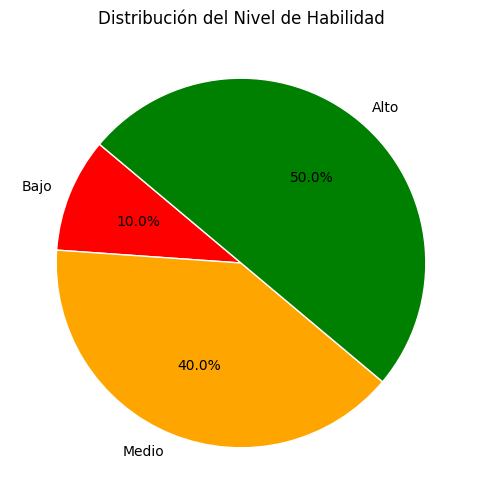

In [3]:
# Primera aproximación: Proporciones

# Etiquetas y valores
labels = ['Bajo', 'Medio', 'Alto']
sizes = [habilidad_bajo, habilidad_media, habilidad_alta]
colors = ['red', 'orange', 'green']

# Crear gráfico de torta
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, wedgeprops={'edgecolor': 'white'})

# Título
plt.title("Distribución del Nivel de Habilidad")

# Mostrar gráfico
plt.show()

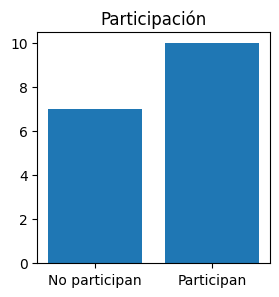

In [4]:
# Segunda aproximación: Participación

asistencia = 17
participacion = habilidad_bajo + habilidad_media + habilidad_alta

# Etiquetas y valores
labels = ['No participan', 'Participan']
sizes = [asistencia - participacion, participacion]
colors = ['red', 'green']

# Crear gráfico de torta
plt.figure(figsize=(3, 3))
plt.bar(height=sizes, x=labels)

# Título
plt.title("Participación")

# Mostrar gráfico
plt.show()

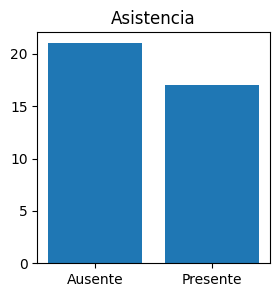

In [5]:
# Tercera aproximación: Asistencia

n_alumnos = 38
# Etiquetas y valores
labels = ['Ausente', 'Presente']
sizes = [n_alumnos - asistencia, asistencia]

# Crear gráfico de torta
plt.figure(figsize=(3, 3))
plt.bar(height=sizes, x=labels)

# Título
plt.title("Asistencia")

# Mostrar gráfico
plt.show()

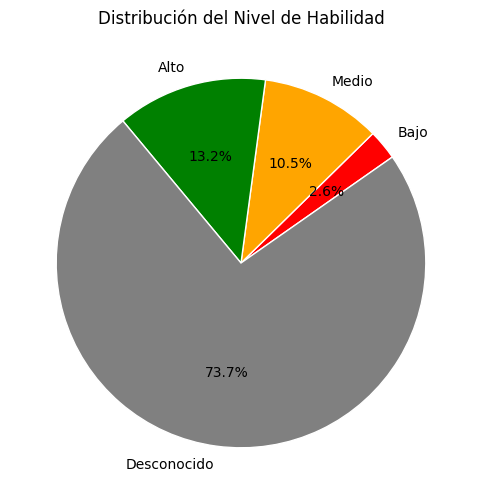

In [6]:
# Proporción integrada

# Etiquetas y valores
desconocido = (n_alumnos - asistencia) + (asistencia - participacion)

labels = ['Bajo', 'Medio', 'Alto', 'Desconocido']
sizes = [habilidad_bajo, habilidad_media, habilidad_alta, desconocido]
colors = ['red', 'orange', 'green', 'gray']

# Crear gráfico de torta
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=35, wedgeprops={'edgecolor': 'white'})

# Título
plt.title("Distribución del Nivel de Habilidad")

# Mostrar gráfico
plt.show()

In [7]:
# Caracterización completa

data = {
    "Alumno": [f"Alumno {i+1}" for i in range(n_alumnos)],
    "Asistencia": ['Asistente']*asistencia + ['Inasistente']*(n_alumnos - asistencia),
    "Participación": ['Participa']*participacion + ['No Participa']*(n_alumnos - participacion),
    "Nivel de Habilidad": ['bajo']*habilidad_bajo + ['medio']*habilidad_media + ['alto']*habilidad_alta + [None]*(n_alumnos - participacion),
}

df = pd.DataFrame(data)

# Contar categorías para el Treemap
df_treemap = df.groupby(["Asistencia", "Participación", "Nivel de Habilidad"], dropna=False).size().reset_index(name="Cantidad")

# Crear Treemap con Plotly Express
fig = px.treemap(
    df_treemap,
    path=["Asistencia", "Participación", "Nivel de Habilidad"],
    values="Cantidad",
    title="Caracterización de Alumnos WS1 DV 2025",
    color='Participación',
    color_continuous_scale="viridis"
)

fig.show()